## A Simple Tutorial For using QCAD

In [1]:
from QCAD import Module, QuantumCircuit, execute
from QCAD import TypicalModule as tm

import numpy as np

### 1. Definition of Module
- 이미 정의된 Module을 아래 나열하였습니다. </br> TypicalModule Class를 이용해 사용하시면 됩니다.

- tm.I, tm.H, tm.X, tm.Y, tm.Z, tm.CX, tm.CZ, tm.CCX, tm.CCZ, tm.RX, tm.RY, tm.RZ, tm.U, tm.MCU

- 이미 정의된 모듈을 재사용하여 새로운 모듈을 정의할 수 있습니다. </br> 이때 모듈의 PORT 순서를 변경할 수 있습니다.

In [2]:
rx_half_pi = tm.RX(np.pi/2)

custom_u = tm.U(2, [[-1, 0], [0, 1]])

multi_control_h = tm.MCU(3, [0, 1], tm.H[2])

M = Module('M', 4, [tm.H[0],
                    tm.Z[3],
                    tm.X[2],
                    tm.Y[1],
                    tm.T[1],
                    tm.S[2],
                    tm.I[0]])

N = Module('N', 4, [M[0, 2, 3, 1]])

N.typ_decompose()

([<QCAD.module.Module at 0x7f095053ba20>,
 [[0], [1], [3], [2], [2], [3], [0]])

### 2. Quantum Circuit Description using Modules

Quantum Circuit은 사실상 하나의 큰 모듈과 같습니다. </br> 모듈을 정의한 뒤 이를 이용해 QC를 생성합니다.

In [3]:
qc = QuantumCircuit(N)

### 3. Simulation of Quantum Circuit with arbitrary initial state

[0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, (-0.5+0.5000000000000001j), (-0.5+0.5000000000000001j), 0j, 0j]


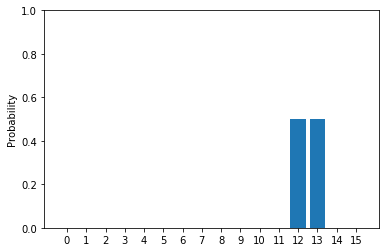

[0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, (-0.35355339059327373+0.3535533905932738j), (-0.35355339059327373+0.3535533905932738j), (0.35355339059327373-0.3535533905932738j), (0.35355339059327373-0.3535533905932738j)]


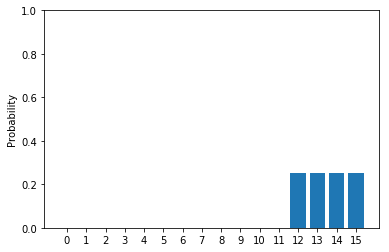

[0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, (-0.5+0.5000000000000001j), (-0.5+0.5000000000000001j), 0j, 0j]


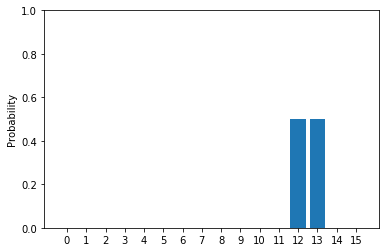

In [5]:
execute('MatrixModel', qc)
execute('MatrixModel', qc, [[1, 0], [1/np.sqrt(2), 1/np.sqrt(2)], [1, 0], [1, 0]])
execute('MatrixModel', qc, [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### 4. Simulating using C++ simulator

아직 제작 중입니다. 개발 완료된 부분과 개발 예정인 부분은 다음과 같습니다.

> ### 성능
> 랩톱 기준 (i5 4세대, 4GB RAM)
> 25qubit 1개 게이트 1초 정도 소요

> ### 현재 상태
> 1. ONLY single target gates
> 1. Results are on the console
> 1. Initial state = |0>

> ### 개발 예정 (~1/8)
> 1. CNOT gate
> 1. Arbitrary initial state
> 1. Running time measurement (Interface?)
> 1. Visualization using graphs, interaction with python output stream
> 1. Optimization for particular single gates Ex) X, Y ...

In [1]:
from QCAD import Module, QuantumCircuit, execute
from QCAD import TypicalModule as tm

import numpy as np

M = Module('M', 4, [tm.H[0],
                    tm.CX[1, 2]])
N = Module('N', 25, [M[3, 4, 5, 6]])

qc = QuantumCircuit(N)

execute('Cimulator', qc, option='NoPrint')